This is the dataset containing tweets from parody and real accounts.

- `person`: Name of politician (eg. Boris Johnson)
- `account`: Twitter account name (eg. @BorisJohnson)
- `tweet_id`: The id of the given tweet
- `tweet_pp`: The tweet text, pre-processed
- `tweet_raw`: The tweet text, in its original form
- `label`: Whether the tweet is parody (0) or real (1)

# 2) Gender Split Experiment

## 2.1) Male training data and Female testing data

## Data Exploration

In [30]:
#!pip install emoji

  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49714 sha256=74575cbccfa0a70566ed85ccf07333fa8cae7514f7fb3ea45d7d6a86c6ae566f
  Stored in directory: c:\users\talha\appdata\local\pip\cache\wheels\43\3d\82\e7baffa5e86346c6178d7750dba6e8ef063282a37fc563f8f8
Successfully built emoji


In [1]:
#Importing the required libraries to read,visualize and model the givn dataset files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyo
# Set notebook mode to work in offline
pyo.init_notebook_mode()
import missingno as msno 
import warnings
warnings.filterwarnings("ignore")
import re
import re
import string
import nltk
import itertools
import emoji
from nltk.corpus import stopwords
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
import nltk
from nltk.tokenize import word_tokenize,RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from platform import python_version
print (python_version())

3.8.5


In [2]:
from textacy.preprocessing.replace import replace_urls

In [3]:
# Read the dataset csv files and create pandas datframes
maletrain_df=pd.read_csv("C:/Users/Talha/data_publish/gender/test_on_female/maletrain.csv")
femaletest_df=pd.read_csv("C:/Users/Talha/data_publish/gender/test_on_female/femaletest.csv") 
print("Train and Test data sets are imported successfully")

Train and Test data sets are imported successfully


In [4]:
# Define a function to explore the train and test dataframes
def explore_data(df):
    
    '''Input- df= pandas dataframes to be explored
       Output- print shape, info and first 5 records of the dataframe 
    '''
    
    print("-"*50)
    print('Shape of the dataframe:',df.shape)
    print("Number of records in train data set:",df.shape[0])
    print("Information of the dataset:")
    df.info()
    print("-"*50)
    print("First 5 records of the dataset:")
    return df.head()
    print("-"*50)

In [5]:
# Lets use explore_data() function to explore train data
explore_data(maletrain_df)

--------------------------------------------------
Shape of the dataframe: (101182, 6)
Number of records in train data set: 101182
Information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101182 entries, 0 to 101181
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tweet_id   101182 non-null  int64 
 1   person     101182 non-null  object
 2   account    101182 non-null  object
 3   tweet_pp   101182 non-null  object
 4   tweet_raw  101182 non-null  object
 5   label      101182 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 4.6+ MB
--------------------------------------------------
First 5 records of the dataset:


tweet_id     person       account  \
0  1189174705367977984  Paul Ryan  @speakerryan   
1  1188790915353268225  Paul Ryan  @speakerryan   
2  1171428487665770496  Paul Ryan  @speakerryan   
3  1128442085005254656  Paul Ryan  @speakerryan   
4  1126206857696223233  Paul Ryan  @speakerryan   

                                            tweet_pp  \
0  every american deserves the opportunity to ach...   
1  i excited to launch the american idea foundati...   
2  honored to join <mention> as a distinguished v...   
3  i respected , admired , and adored her . a sta...   
4  robert pear was one of the most brilliant & de...   

                                           tweet_raw  label  
0  b'Every American deserves the opportunity to a...      1  
1  b'I’m excited to launch the American Idea Foun...      1  
2  b'Honored to join @AEI as a Distinguished Visi...      1  
3  b'I respected, admired, and adored her. A stat...      1  
4  b'Robert Pear was one of the most brilliant &a...      1

In [6]:
# Lets use explore_data() function to explore test data
explore_data(femaletest_df)

--------------------------------------------------
Shape of the dataframe: (21646, 6)
Number of records in train data set: 21646
Information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21646 entries, 0 to 21645
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   21646 non-null  int64 
 1   person     21646 non-null  object
 2   account    21646 non-null  object
 3   tweet_pp   21646 non-null  object
 4   tweet_raw  21646 non-null  object
 5   label      21646 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1014.8+ KB
--------------------------------------------------
First 5 records of the dataset:


tweet_id       person       account  \
0  1179705458845720576  Theresa May  @theresa_may   
1  1167019873987432449  Theresa May  @theresa_may   
2  1154034955539795969  Theresa May  @theresa_may   
3  1153999851270627328  Theresa May  @theresa_may   
4  1153677412317745152  Theresa May  @theresa_may   

                                            tweet_pp  \
0  i'm pleased the domestic abuse bill has passed...   
1  sorry to see <mention> step down as leader of ...   
2  i will continue to do all i can to serve the n...   
3  at its heart , politics is about the differenc...   
4  many congratulations to our new <mention> cand...   

                                           tweet_raw  label  
0  b"I'm pleased the Domestic Abuse Bill has pass...      1  
1  b"Sorry to see @RuthDavidsonMSP step down as L...      1  
2  b'I will continue to do all I can to serve the...      1  
3  b'At its heart, politics is about the differen...      1  
4  b'Many congratulations to our new @Conservativ...      1

In [7]:
# Check missing values in Training Data
maletrain_df.isnull().sum()

tweet_id     0
person       0
account      0
tweet_pp     0
tweet_raw    0
label        0
dtype: int64

In [8]:
# Check missing values in testing Data
femaletest_df.isnull().sum()

tweet_id     0
person       0
account      0
tweet_pp     0
tweet_raw    0
label        0
dtype: int64

In [9]:
#Lets visulaize dataframe features using charts
def feature_viz(df,feature):
    
    '''Input- df=pandas dataframe
              feature= column to be charted
       Output- bar and scatter chart using plotly       
    
    '''
    #Visualize the feature
    if feature=='label':
        sns.countplot(feature, data=df)
        print('Label of 0 is {} % of total'.format(round(df[feature].value_counts()[0]/len(df[feature])*100)))
        print('Label of 1 is {} % of total'.format(round(df[feature].value_counts()[1]/len(df[feature])*100)))
    else:
        #Distinct keywords in train dataset
        feat=df[feature].value_counts()
        print(feat.head())
        fig = px.scatter(feat, x=feat.values, y=feat.index,size=feat.values)
        fig.show()

Label of 0 is 50 % of total
Label of 1 is 50 % of total


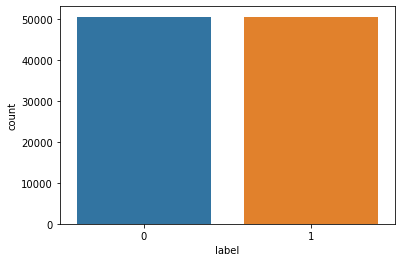

In [10]:
#Lets use feature_viz function to create charts for 'target' column
feature_viz(maletrain_df,'label')

Lee Hsien Loong    6149
Rahul Gandhi       5131
Barack Obama       4484
Steve Barclay      4392
Nick Boles         4095
Name: person, dtype: int64


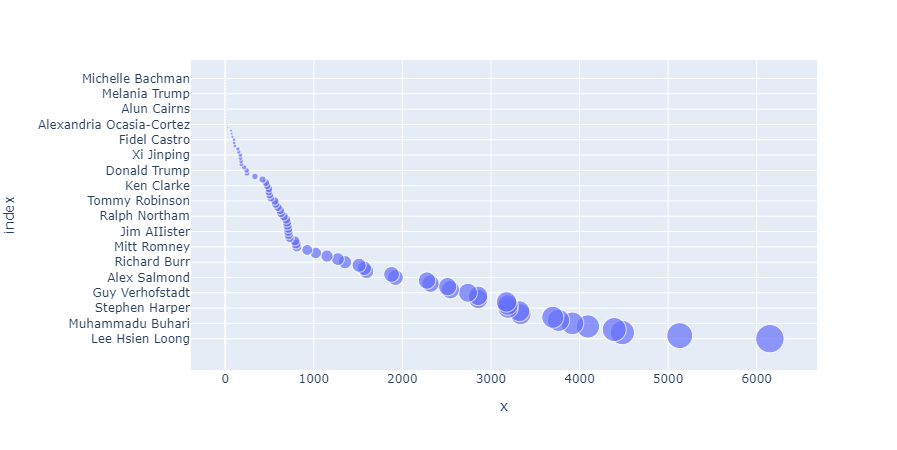

In [11]:
feature_viz(maletrain_df,'person')

Let's check how often the word 'parody' come in the 'tweet' feature in the dataset and whether this help us in determining whether a tweet belongs to a parody' category or not.

In [12]:
maletrain_df.loc[maletrain_df['tweet_raw'].str.contains('parody', na=False, case=False)].label.value_counts()

0    215
1      2
Name: label, dtype: int64

Lets further analyize the `tweet_raw` feature and if there is any correlation between `tweet_raw` and length of the tweets itself.

In [13]:
# Lets find the length of the 'tweet_raw' for each row and add a new cloumn to persontrain dataframe 
maletrain_df['tweet_raw_length'] = maletrain_df['tweet_raw'].apply(lambda x : len(x))
maletrain_df.head(4)

tweet_id     person       account  \
0  1189174705367977984  Paul Ryan  @speakerryan   
1  1188790915353268225  Paul Ryan  @speakerryan   
2  1171428487665770496  Paul Ryan  @speakerryan   
3  1128442085005254656  Paul Ryan  @speakerryan   

                                            tweet_pp  \
0  every american deserves the opportunity to ach...   
1  i excited to launch the american idea foundati...   
2  honored to join <mention> as a distinguished v...   
3  i respected , admired , and adored her . a sta...   

                                           tweet_raw  label  tweet_raw_length  
0  b'Every American deserves the opportunity to a...      1               280  
1  b'I’m excited to launch the American Idea Foun...      1               276  
2  b'Honored to join @AEI as a Distinguished Visi...      1               278  
3  b'I respected, admired, and adored her. A stat...      1               118

In [14]:
maletrain_df.tweet_raw_length.describe()

count    101182.000000
mean        143.191585
std          75.211370
min           4.000000
25%          89.000000
50%         134.000000
75%         184.000000
max         488.000000
Name: tweet_raw_length, dtype: float64

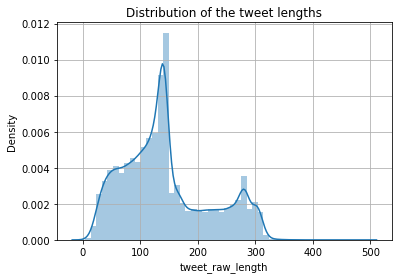

In [15]:
#Create distribution chart to visualize text length distribution
ax=sns.distplot(maletrain_df['tweet_raw_length']).set_title('Distribution of the tweet lengths');
plt.grid(True)

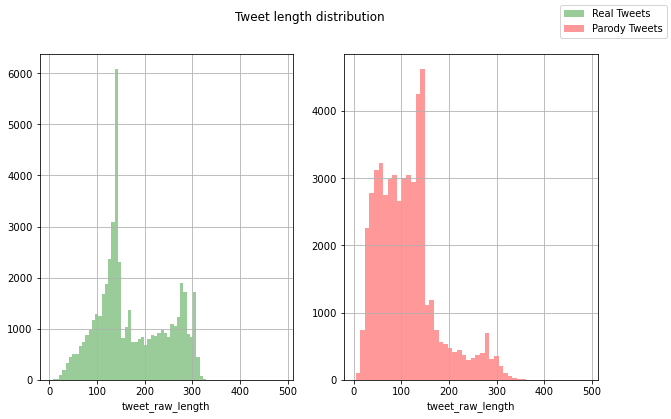

In [16]:
#Create visualization of the distribution of tweet length in comparision to label feature
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True,figsize=(10,6))
sns.distplot(maletrain_df[(maletrain_df['label'] == 1)]['tweet_raw_length'], ax=ax1, kde=False, color='green',label='Real Tweets')
sns.distplot(maletrain_df[(maletrain_df['label'] == 0)]['tweet_raw_length'],ax=ax2, kde=False, color='red',label='Parody Tweets');
f.suptitle('Tweet length distribution')
f.legend(loc='upper right')
ax1.grid()
ax2.grid()
plt.show()

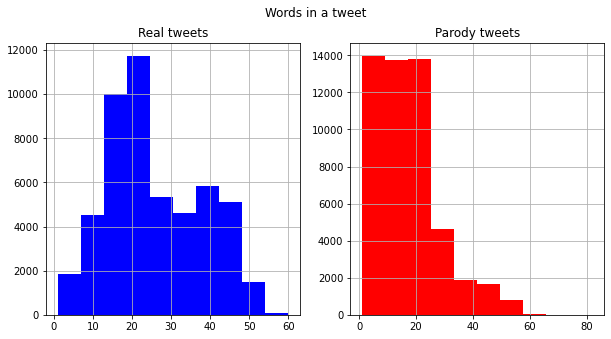

In [17]:
#Create visualization of the distribution of the word counts in comparision to label feature
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
real_tweet=maletrain_df[maletrain_df['label']==1]['tweet_raw'].str.split().map(lambda x: len(x))
ax1.hist(real_tweet,color='blue')
ax1.set_title('Real tweets')
ax1.grid()
parody_tweet=maletrain_df[maletrain_df['label']==0]['tweet_raw'].str.split().map(lambda x: len(x))
ax2.hist(parody_tweet,color='red')
ax2.set_title('Parody tweets')
ax2.grid()
fig.suptitle('Words in a tweet')
plt.show()

### Exploring the Label Column

- Distribution of the Label Column-
   - We have to predict whether a given tweet is about a real or parody.
   - If real, predict a `1`. If not, predict a `0`.
- Exploring the Label Column- Let's look at what the real and the parody tweets look like.

In [18]:
# A real tweet exmaple
real_tweets=maletrain_df[maletrain_df['label']==1]['tweet_raw'][10:20]
real_tweets

10    b'Congressman Walter Jones was a true gentlema...
11    b'So, so proud of my father-in-law, Dan Little...
12    b'Robert Doar is an excellent choice to succee...
13    b'To all of our men and women around the world...
14    b'There are many people around this place that...
15    b'Proud to sign Criminal Justice Reform legisl...
16    b'The House is indebted to Secretary Mattis fo...
17    b'The House just passed criminal justice refor...
18    b'Tune in live soon for @HouseGOP leadership’s...
19    b'In this 21st-century digital age, it’s imper...
Name: tweet_raw, dtype: object

In [22]:
# A parody tweet exmaple
parody_tweets=maletrain_df[maletrain_df['label']==0]['tweet_raw'][4000:4220]
parody_tweets

54603    b'The #leadersdebate is irrelevant - old fashi...
54604    b'Lets hear a bit of truth in this leaders deb...
54605    b'Ask MP @davidburrowesmp why he spent 12 hour...
54606    b"Inflation is low... that's cause we don't bo...
54607    b'Employment has never been better. Big hello ...
                               ...                        
54818    b'This probing amendment all sounds like a bit...
54819    b'Tax avoidance schemes for the little man are...
54820    b'@GaryBarlow Careful Gary, your name might be...
54821    b'@ChrisMoyles Congratulations, the Finance Bi...
54822    b'@IanMearnsMP I can feel the noose tightening...
Name: tweet_raw, Length: 220, dtype: object

## Data Preprocessing

### Data Cleaning

Before starting any NLP project, text data needs to be pre-processed to convert it into in a consistent format.Text will be cleaned, tokneized and converted into a matrix.

In [23]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are",
"thx"   : "thanks"
}

In [24]:
def remove_contractions(text):
    return contractions[text.lower()] if text.lower() in contractions.keys() else text

In [25]:
maletrain_df.tweet_raw=maletrain_df.tweet_raw.apply(remove_contractions)
femaletest_df.tweet_raw=femaletest_df.tweet_raw.apply(remove_contractions)

In [26]:
def clean_dataset(text):
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove tickers
    text = re.sub(r'\$\w*', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)
    # Remove whitespace (including new line characters)
    text = re.sub(r'\s\s+','', text)
    text = re.sub(r'[ ]{2, }',' ',text)
    # Remove URL, RT, mention(@)
    text=  re.sub(r'http(\S)+', '',text)
    text=  re.sub(r'http ...', '',text)
    text=  re.sub(r'(RT|rt)[ ]*@[ ]*[\S]+','',text)
    text=  re.sub(r'RT[ ]?@','',text)
    text = re.sub(r'@[\S]+','',text)
    # Remove words with 4 or fewer letters
    text = re.sub(r'\b\w{1,4}\b', '', text)
    #&, < and >
    text = re.sub(r'&amp;?', 'and',text)
    text = re.sub(r'&lt;','<',text)
    text = re.sub(r'&gt;','>',text)
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF') 
    text = text.strip()
    # Remove misspelling words
    text = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))
    # Remove emoji
    text = emoji.demojize(text)
    text = text.replace(":"," ")
    text = ' '.join(text.split()) 
    text = re.sub("([^\x00-\x7F])+"," ",text)
    # Remove Mojibake (also extra spaces)
    text = ' '.join(re.sub("[^\u4e00-\u9fa5\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    return text

In [32]:
# Lets apply the clean_text function to both test and training datasets copies
maletrain_df1=maletrain_df.copy()
femaletest_df1=femaletest_df.copy()

In [33]:
maletrain_df1.tweet_raw=maletrain_df1.tweet_raw.apply(clean_dataset)
femaletest_df1.tweet_raw=femaletest_df1.tweet_raw.apply(clean_dataset)

In [34]:
#Lets look cleaned text data
def text_after_preprocess(before_text,after_text):
    
    '''
    Input- before_text=text column before cleanup
              after_text= text column after cleanup
       Output- print before and after text to compare how it looks after cleanup
       
    '''
    print('-'*60)
    print('Text before cleanup')
    print('-'*60)
    print(before_text.head(5))
    print('-'*60)
    print('Text after cleanup')
    print('-'*60)
    print(after_text.head(5))

In [35]:
text_after_preprocess(maletrain_df.tweet_raw,maletrain_df1.tweet_raw)

------------------------------------------------------------
Text before cleanup
------------------------------------------------------------
0    b'Every American deserves the opportunity to a...
1    b'I’m excited to launch the American Idea Foun...
2    b'Honored to join @AEI as a Distinguished Visi...
3    b'I respected, admired, and adored her. A stat...
4    b'Robert Pear was one of the most brilliant &a...
Name: tweet_raw, dtype: object
------------------------------------------------------------
Text after cleanup
------------------------------------------------------------
0    Every American deserves opportunity achieve th...
1    excited launch American Foundation partisan pr...
2    Honored Distinguished Visiting Fellow grateful...
3    respected admired adored statement passing fri...
4    Robert brilliantdecent people encountered Wash...
Name: tweet_raw, dtype: object


In [36]:
text_after_preprocess(femaletest_df.tweet_raw,femaletest_df1.tweet_raw)

------------------------------------------------------------
Text before cleanup
------------------------------------------------------------
0    b"I'm pleased the Domestic Abuse Bill has pass...
1    b"Sorry to see @RuthDavidsonMSP step down as L...
2    b'I will continue to do all I can to serve the...
3    b'At its heart, politics is about the differen...
4    b'Many congratulations to our new @Conservativ...
Name: tweet_raw, dtype: object
------------------------------------------------------------
Text after cleanup
------------------------------------------------------------
0    pleased Domestic Abuse passed second reading H...
1    Sorry Leader Thank party Union years enjoy des...
2    continue serve national interest making United...
3    heart politics about difference every lives pe...
4    congratulations candidates their selection Bar...
Name: tweet_raw, dtype: object


### Tokenization
Tokenization is a process which splits an input text into tokens and the tokens can be a word, sentence, paragraph etc.

Following code will show how tokenization of text works:

In [130]:
# Lets Tokenize the training and the test dataset copies with  DLATK, a Twitter-aware tokenizer
from happiestfuntokenizing.happiestfuntokenizing import Tokenizer
tokenizer = Tokenizer()

In [39]:
maletrain_df1['tweet_raw'] = maletrain_df1['tweet_raw'].apply(lambda x: tokenizer.tokenize(x))
femaletest_df1['tweet_raw'] = femaletest_df1['tweet_raw'].apply(lambda x: tokenizer.tokenize(x))

In [40]:
#Lets check tokenized text
maletrain_df1['tweet_raw'].head()

0    [every, american, deserves, opportunity, achie...
1    [excited, launch, american, foundation, partis...
2    [honored, distinguished, visiting, fellow, gra...
3    [respected, admired, adored, statement, passin...
4    [robert, brilliantdecent, people, encountered,...
Name: tweet_raw, dtype: object

In [41]:
femaletest_df1['tweet_raw'].head()

0    [pleased, domestic, abuse, passed, second, rea...
1    [sorry, leader, thank, party, union, years, en...
2    [continue, serve, national, interest, making, ...
3    [heart, politics, about, difference, every, li...
4    [congratulations, candidates, their, selection...
Name: tweet_raw, dtype: object

### Stopwords Removal

Now, let's get rid of the stopwords i.e words which occur very frequently and have possible value like a, an, the, are etc.

In [42]:
#Create a funtion to remove stopwords
def remove_stopwords(text):
    
    """
    Input- text=text from which english stopwprds will be removed
    Output- return text without english stopwords 
    
    """
    words = [w for w in text if w not in stopwords.words('english')]
    return words

In [43]:
maletrain_df1['tweet_raw'] = maletrain_df1['tweet_raw'].apply(lambda x : remove_stopwords(x))
femaletest_df1['tweet_raw'] = femaletest_df1['tweet_raw'].apply(lambda x : remove_stopwords(x))

### Stemming and Lemmatization
- **Stemming**: Removing and replacing suffixes to get to the root form of the word, which is called the stem for instance cats - cat, wolves - wolv
- **Lemmatization** : Returns the base or dictionary form of a word, which is known as the lemma

It is important to note that stemming and lemmatization sometimes doesnt necessarily improve results as sometimes we dont want to trim words rather preserve their original form.Its usage from problem to problem and for this problem it wouldnt be good idea to use it.

In [44]:
# Lets combine text after processing it
def combine_text(text):
    
    '''
    Input-text= list cleand and tokenized text
    Output- Takes a list of text and returns combined one large chunk of text.
    
    '''
    all_text = ' '.join(text)
    return all_text

In [45]:
maletrain_df1['tweet_raw'] = maletrain_df1['tweet_raw'].apply(lambda x : combine_text(x))
femaletest_df1['tweet_raw'] = femaletest_df1['tweet_raw'].apply(lambda x : combine_text(x))

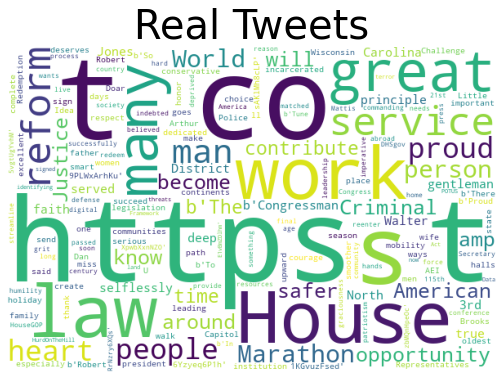

In [46]:
#Lets have a quick look of the tweets in wordcloud
from wordcloud import WordCloud
fig, ax = plt.subplots(figsize=[10, 6])
wordcloud = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(real_tweets))
ax.imshow(wordcloud)
ax.axis('off')
ax.set_title('Real Tweets',fontsize=40);

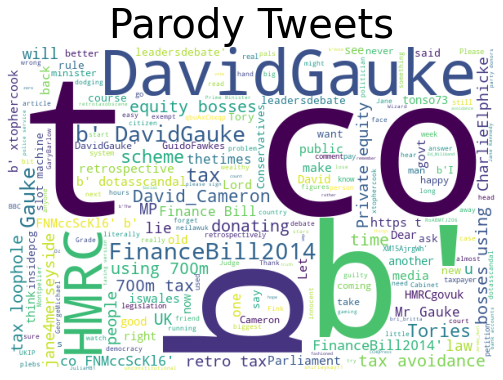

In [47]:
#Lets have a quick look of the tweets in wordcloud
from wordcloud import WordCloud
fig, ax = plt.subplots(figsize=[10, 6])
wordcloud = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(parody_tweets))
ax.imshow(wordcloud)
ax.axis('off')
ax.set_title('Parody Tweets',fontsize=40);

# 3. Vectorization of text

Pre-process text needs to be transformed into a vetor matrix of numbers before a machine learning model can undertsand it and learn from it.This can be done by a number of tecniques:

## 1. Bag of Words

The bag of words is a representation of text that describes the occurrence of words within a document. It involves two things:
- A vocabulary of known words.
- A measure of the presence of known words.

**Why is it is called a “bag” of words?** Its called bag of words because any information about the order or structure of words in the document is discarded and the model is only concerned with whether the known words occur in the document, not where they occur in the document.

### Bag of Words - Countvectorizer Features

`Countvectorizer` converts a collection of text documents to a matrix of token counts. It is important to note that `CountVectorizer` comes with a lot of options to automatically do preprocessing, tokenization, and stop word removal. However, all the pre-processing of the text has already been performed by creating a function.Only vanilla version of `Countvectorizer` will be used.

## 2. TFIDF Features

A problem with the bag of words approach is that highly frequent words start to dominate in the document (e.g. larger score) but may not contain as much “informational content” this will lead to more weight to longer documents than shorter documents.

To avoid that, one approach is to rescale the frequency of words by how often they appear in all documents so that the scores for frequent words like “the” that are also frequent across all documents are penalized. This approach to scoring is called "Term Frequency-Inverse Document Frequency", or TF-IDF for short, where:

**Term Frequency**: is a scoring of the frequency of the word in the current document.

`TF = (Number of times term t appears in a document)/(Number of terms in the document)`

**Inverse Document Frequency**: is a scoring of how rare the word is across documents.

`IDF = 1+log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.`

In [48]:
# Vectorize the text using CountVectorizer
count_vectorizer = CountVectorizer(ngram_range=(1,2))
maletrain_cv = count_vectorizer.fit_transform(maletrain_df1['tweet_raw'])
femaletest_cv = count_vectorizer.transform(femaletest_df1["tweet_raw"])

In [49]:
## Keeping only non-zero elements to preserve space 
print(maletrain_cv[0].todense())

[[0 0 0 ... 0 0 0]]


In [50]:
# Vectorize the text using TFIDF
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 3))
maletrain_tf = tfidf.fit_transform(maletrain_df1['tweet_raw'])
femaletest_tf = tfidf.transform(femaletest_df1["tweet_raw"])

In [51]:
maletrain_cv.shape

(101182, 589735)

In [52]:
femaletest_cv.shape

(21646, 589735)

In [53]:
maletrain_tf.shape

(101182, 114824)

In [54]:
femaletest_tf.shape

(21646, 114824)

# 4. Build a Text Classification Machine Learning model

Lets create a simple classification model using commonly used calssification algorithms and check how the models performs.

## 4.1) Linear Baseline

### LR-BOW (Linear Regression - Bag of Words)

In [55]:
#Define a function to fit and predict on training and test data sets
def fit_and_predict(model,X_train,y_train,X_test,y_test):
    
    '''Input- model=model to be trained
              X_train, y_train= traing data set
              X_test,  y_test = testing data set
       Output- Print accuracy of model for training and test data sets   
    '''
    
    # Fitting a simple Logistic Regression on Counts
    clf = model
    clf.fit(X_train, y_train)
    predictions=clf.predict(X_test)
    conf_m=confusion_matrix(y_test,predictions)
    print(classification_report(y_test,predictions))
    print('-'*50)
    print("{}" .format(model))
    print('-'*50)
    print('Accuracy of classifier on training set:{}%'.format(round(clf.score(X_train, y_train)*100)))
    print('-'*50)
    print('Accuracy of classifier on test set:{}%' .format(round(accuracy_score(y_test,predictions)*100)))
    print('-'*50)
    
    # plot confusion matrix as heatmap
    sns.set(font_scale=1.2)
    ax = sns.heatmap(conf_m, annot=True,xticklabels=['Real', 'Parody'], yticklabels=['Real', 'Parody'], 
                 cbar=True, cmap='RdBu',linewidths=1, linecolor='black', fmt='.0f')
    plt.yticks(rotation=0)
    ax.set_ylim([0,2])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    ax.xaxis.set_ticks_position('top') 
    plt.title('Confusion matrix - test data\n(Real, Parody) Tweets')
    plt.show()


In [56]:
# Create a list of the regression models to be used
models=[LogisticRegression(C=1.0)]

              precision    recall  f1-score   support

           0       0.74      0.89      0.81     11427
           1       0.84      0.65      0.73     10219

    accuracy                           0.78     21646
   macro avg       0.79      0.77      0.77     21646
weighted avg       0.79      0.78      0.77     21646

--------------------------------------------------
LogisticRegression()
--------------------------------------------------
Accuracy of classifier on training set:97%
--------------------------------------------------
Accuracy of classifier on test set:78%
--------------------------------------------------


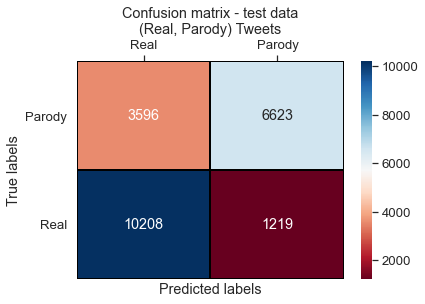

In [57]:
# Loop through the list of models and use 'fit_and_predict()' function to trian and make predictions
for model in models:
    fit_and_predict(model,maletrain_cv, maletrain_df.label,femaletest_cv,femaletest_df.label)

              precision    recall  f1-score   support

           0       0.76      0.85      0.80     11427
           1       0.81      0.69      0.74     10219

    accuracy                           0.78     21646
   macro avg       0.78      0.77      0.77     21646
weighted avg       0.78      0.78      0.77     21646

--------------------------------------------------
LogisticRegression()
--------------------------------------------------
Accuracy of classifier on training set:90%
--------------------------------------------------
Accuracy of classifier on test set:78%
--------------------------------------------------


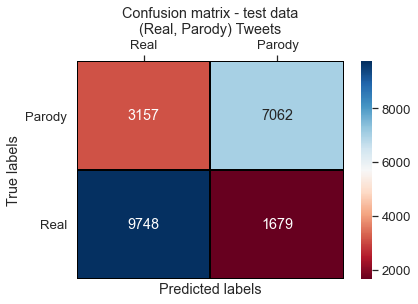

In [58]:
for model in models:
    fit_and_predict(model,maletrain_tf,maletrain_df.label,femaletest_tf,femaletest_df.label)

### LR-BOW+POS (Linear Regression - Bag of Words plus Part of Speech)

#### Import data and tokenize the text 

In [59]:
maletrain_df_POS=maletrain_df.copy()
femaletest_df_POS=femaletest_df.copy()

In [60]:
# Lets clean data
maletrain_df_POS.tweet_raw=maletrain_df_POS.tweet_raw.apply(clean_dataset)
femaletest_df_POS.tweet_raw=femaletest_df_POS.tweet_raw.apply(clean_dataset)

In [61]:
maletrain_df_POS['tweet_raw'] = maletrain_df_POS['tweet_raw'].apply(lambda x: tokenizer.tokenize(x))
femaletest_df_POS['tweet_raw'] = femaletest_df_POS['tweet_raw'].apply(lambda x: tokenizer.tokenize(x))

### Part of Speech Tagging POS

In [62]:
def POS(x):
    return nltk.pos_tag(x)

In [63]:
maletrain_df_POS['tweet_raw_POS']=maletrain_df_POS['tweet_raw'].apply(lambda x: POS(x))
maletrain_df_POS['tweet_raw_POS'].head()

0    [(every, DT), (american, JJ), (deserves, NNS),...
1    [(excited, VBN), (launch, JJ), (american, JJ),...
2    [(honored, VBN), (distinguished, VBD), (visiti...
3    [(respected, VBN), (admired, VBD), (adored, JJ...
4    [(robert, JJ), (brilliantdecent, NN), (people,...
Name: tweet_raw_POS, dtype: object

In [64]:
femaletest_df_POS['tweet_raw_POS']=femaletest_df_POS['tweet_raw'].apply(lambda x: POS(x))
femaletest_df_POS['tweet_raw_POS'].head()

0    [(pleased, JJ), (domestic, JJ), (abuse, NN), (...
1    [(sorry, JJ), (leader, NN), (thank, NN), (part...
2    [(continue, NN), (serve, VBP), (national, JJ),...
3    [(heart, NN), (politics, NNS), (about, IN), (d...
4    [(congratulations, NNS), (candidates, NNS), (t...
Name: tweet_raw_POS, dtype: object

In [68]:
def combine(text):
    values = ','.join(str(v) for v in text)
    return values

In [69]:
maletrain_df_POS['tweet_raw_POS']=maletrain_df_POS['tweet_raw_POS'].apply(lambda x : combine(x))
femaletest_df_POS['tweet_raw_POS']=femaletest_df_POS['tweet_raw_POS'].apply(lambda x : combine(x))

In [70]:
maletrain_df_POS['tweet_raw_POS'].head()

0    ('every', 'DT'),('american', 'JJ'),('deserves'...
1    ('excited', 'VBN'),('launch', 'JJ'),('american...
2    ('honored', 'VBN'),('distinguished', 'VBD'),('...
3    ('respected', 'VBN'),('admired', 'VBD'),('ador...
4    ('robert', 'JJ'),('brilliantdecent', 'NN'),('p...
Name: tweet_raw_POS, dtype: object

In [76]:
# Vectorize the text using CountVectorizer
count_vectorizer = CountVectorizer(ngram_range=(1,2))
maletrain_cv = count_vectorizer.fit_transform(maletrain_df_POS['tweet_raw_POS'])
femaletest_cv = count_vectorizer.transform(femaletest_df_POS['tweet_raw_POS'])

# Vectorize the text using TFIDF
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 3))
maletrain_tf = tfidf.fit_transform(maletrain_df_POS['tweet_raw_POS'])
femaletest_tf = tfidf.transform(femaletest_df_POS['tweet_raw_POS'])


In [72]:
#Define a function to fit and predict on training and test data sets
def fit_and_predict(model,X_train,y_train,X_test,y_test):
    
    '''Input- model=model to be trained
              X_train, y_train= traing data set
              X_test,  y_test = testing data set
       Output- Print accuracy of model for training and test data sets   
    '''
    
    # Fitting a simple Logistic Regression on Counts
    clf = model
    clf.fit(X_train, y_train)
    predictions=clf.predict(X_test)
    conf_m=confusion_matrix(y_test,predictions)
    print(classification_report(y_test,predictions))
    print('-'*50)
    print("{}" .format(model))
    print('-'*50)
    print('Accuracy of classifier on training set:{}%'.format(round(clf.score(X_train, y_train)*100)))
    print('-'*50)
    print('Accuracy of classifier on test set:{}%' .format(round(accuracy_score(y_test,predictions)*100)))
    print('-'*50)
    
    # plot confusion matrix as heatmap
    sns.set(font_scale=1.2)
    ax = sns.heatmap(conf_m, annot=True,xticklabels=['Real', 'Parody'], yticklabels=['Real', 'Parody'], 
                 cbar=True, cmap='RdBu',linewidths=1, linecolor='black', fmt='.0f')
    plt.yticks(rotation=0)
    ax.set_ylim([0,2])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    ax.xaxis.set_ticks_position('top') 
    plt.title('Confusion matrix - test data\n(Real, Parody) Tweets')
    plt.show()

              precision    recall  f1-score   support

           0       0.75      0.87      0.80     11427
           1       0.82      0.67      0.74     10219

    accuracy                           0.78     21646
   macro avg       0.79      0.77      0.77     21646
weighted avg       0.78      0.78      0.77     21646

--------------------------------------------------
LogisticRegression()
--------------------------------------------------
Accuracy of classifier on training set:93%
--------------------------------------------------
Accuracy of classifier on test set:78%
--------------------------------------------------


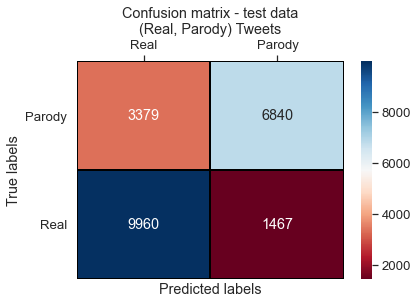

In [73]:
# Create a list of the regression models to be used
models=[LogisticRegression(C=1.0)]

# Loop through the list of models and use 'fit_and_predict()' function to trian and make predictions
for model in models:
    fit_and_predict(model,maletrain_cv, maletrain_df.label,femaletest_cv,femaletest_df.label)

              precision    recall  f1-score   support

           0       0.75      0.85      0.80     11427
           1       0.80      0.68      0.74     10219

    accuracy                           0.77     21646
   macro avg       0.78      0.77      0.77     21646
weighted avg       0.78      0.77      0.77     21646

--------------------------------------------------
LogisticRegression()
--------------------------------------------------
Accuracy of classifier on training set:90%
--------------------------------------------------
Accuracy of classifier on test set:77%
--------------------------------------------------


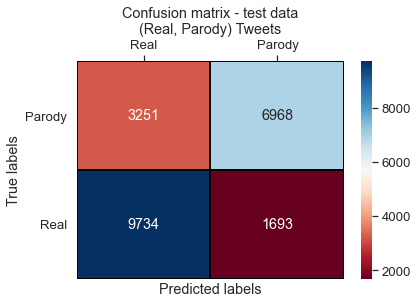

In [77]:
for model in models:
    fit_and_predict(model,maletrain_tf,maletrain_df.label,femaletest_tf,femaletest_df.label)

## 2.2) Female Training Data and Male testing data

In [109]:
# Read the dataset csv files and create pandas datframes
femaletrain_df=pd.read_csv("C:/Users/Talha/data_publish/gender/test_on_male/femaletrain.csv")
maletest_df=pd.read_csv("C:/Users/Talha/data_publish/gender/test_on_male/maletest.csv") 
print("Train and Test data sets are imported successfully")

Train and Test data sets are imported successfully


In [107]:
# Define a function to explore the train and test dataframes
def explore_data(df):
    
    '''Input- df= pandas dataframes to be explored
       Output- print shape, info and first 5 records of the dataframe 
    '''
    
    print("-"*50)
    print('Shape of the dataframe:',df.shape)
    print("Number of records in train data set:",df.shape[0])
    print("Information of the dataset:")
    df.info()
    print("-"*50)
    print("First 5 records of the dataset:")
    return df.head()
    print("-"*50)

In [110]:
# Lets use explore_data() function to explore train data
explore_data(femaletrain_df)

--------------------------------------------------
Shape of the dataframe: (21114, 6)
Number of records in train data set: 21114
Information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21114 entries, 0 to 21113
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   21114 non-null  int64 
 1   person     21114 non-null  object
 2   account    21114 non-null  object
 3   tweet_pp   21114 non-null  object
 4   tweet_raw  21114 non-null  object
 5   label      21114 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 989.8+ KB
--------------------------------------------------
First 5 records of the dataset:


tweet_id       person       account  \
0  1179705458845720576  Theresa May  @theresa_may   
1  1167019873987432449  Theresa May  @theresa_may   
2  1154034955539795969  Theresa May  @theresa_may   
3  1153999851270627328  Theresa May  @theresa_may   
4  1153677412317745152  Theresa May  @theresa_may   

                                            tweet_pp  \
0  i'm pleased the domestic abuse bill has passed...   
1  sorry to see <mention> step down as leader of ...   
2  i will continue to do all i can to serve the n...   
3  at its heart , politics is about the differenc...   
4  many congratulations to our new <mention> cand...   

                                           tweet_raw  label  
0  b"I'm pleased the Domestic Abuse Bill has pass...      1  
1  b"Sorry to see @RuthDavidsonMSP step down as L...      1  
2  b'I will continue to do all I can to serve the...      1  
3  b'At its heart, politics is about the differen...      1  
4  b'Many congratulations to our new @Conservativ...      1

In [111]:
# Lets use explore_data() function to explore test data
explore_data(maletest_df)

--------------------------------------------------
Shape of the dataframe: (109965, 6)
Number of records in train data set: 109965
Information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109965 entries, 0 to 109964
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tweet_id   109965 non-null  int64 
 1   person     109965 non-null  object
 2   account    109965 non-null  object
 3   tweet_pp   109965 non-null  object
 4   tweet_raw  109965 non-null  object
 5   label      109965 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 5.0+ MB
--------------------------------------------------
First 5 records of the dataset:


tweet_id          person           account  \
0  1126927039758569472   Steve Barclay  @SecretaryBrexit   
1   881040242827862016     George Bush   @UnemployedBush   
2  1162070737135591426       Joe Biden  @MillennialBiden   
3  1188924481458331648    Barack Obama      @BarackObama   
4   637103774281011200  Stephen Harper        @pmoharper   

                                            tweet_pp  \
0  <mention> _brexit_ <mention> _letwin <mention>...   
1  <mention> congrats we have officially elected ...   
2  1 . elect joe thing will fundamentally change ...   
3  glad to be back in chicago for the <mention> s...   
4  what i was thinking when when i did my jazz ha...   

                                           tweet_raw  label  
0  b'@Darth_Brexit_ @Oliver_Letwin @PaulCampbell_...      0  
1  b'@realDonaldTrump  congrats we have officiall...      0  
2  b'1. Elect Joe “Nothing will fundamentally cha...      0  
3  b'Glad to be back in Chicago for the @ObamaFou...      1  
4  b'What I was thinking when when I did my jazz ...      0

In [112]:
#Lets visulaize dataframe features using charts
def feature_viz(df,feature):
    
    '''Input- df=pandas dataframe
              feature= column to be charted
       Output- bar and scatter chart using plotly       
    
    '''
    #Visualize the feature
    if feature=='label':
        sns.countplot(feature, data=df)
        print('Label of 0 is {} % of total'.format(round(df[feature].value_counts()[0]/len(df[feature])*100)))
        print('Label of 1 is {} % of total'.format(round(df[feature].value_counts()[1]/len(df[feature])*100)))
    else:
        #Distinct keywords in train dataset
        feat=df[feature].value_counts()
        print(feat.head())
        fig = px.scatter(feat, x=feat.values, y=feat.index,size=feat.values)
        fig.show()

Label of 0 is 53 % of total
Label of 1 is 47 % of total


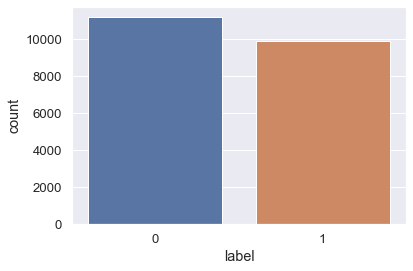

In [113]:
#Lets use feature_viz function to create charts for 'target' column
feature_viz(femaletrain_df,'label')

Hillary Clinton     5171
Ivanka Trump        3898
Sarah Palin         1918
Elizabeth Warren    1693
Theresa May         1240
Name: person, dtype: int64


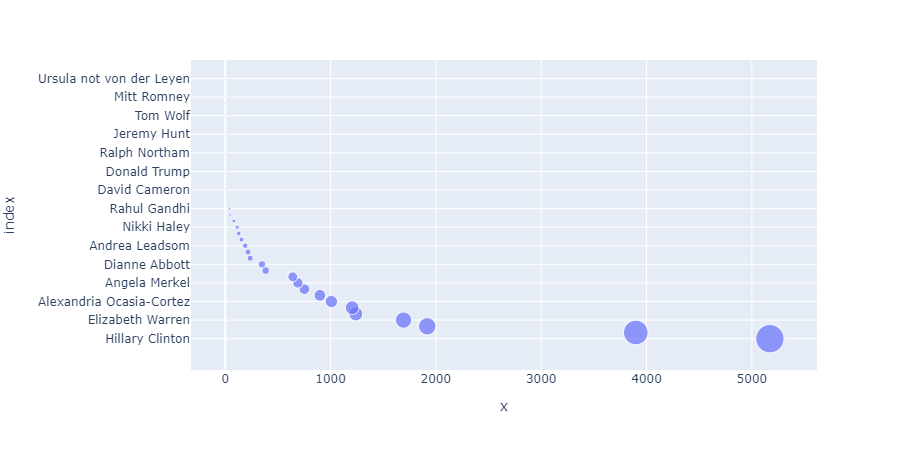

In [114]:
feature_viz(femaletrain_df,'person')

In [115]:
# Lets find the length of the 'tweet_raw' for each row and add a new cloumn to persontrain dataframe 
femaletrain_df['tweet_raw_length'] = femaletrain_df['tweet_raw'].apply(lambda x : len(x))
femaletrain_df.head(4)

tweet_id       person       account  \
0  1179705458845720576  Theresa May  @theresa_may   
1  1167019873987432449  Theresa May  @theresa_may   
2  1154034955539795969  Theresa May  @theresa_may   
3  1153999851270627328  Theresa May  @theresa_may   

                                            tweet_pp  \
0  i'm pleased the domestic abuse bill has passed...   
1  sorry to see <mention> step down as leader of ...   
2  i will continue to do all i can to serve the n...   
3  at its heart , politics is about the differenc...   

                                           tweet_raw  label  tweet_raw_length  
0  b"I'm pleased the Domestic Abuse Bill has pass...      1               302  
1  b"Sorry to see @RuthDavidsonMSP step down as L...      1               209  
2  b'I will continue to do all I can to serve the...      1               215  
3  b'At its heart, politics is about the differen...      1               146

In [116]:
femaletrain_df.tweet_raw_length.describe()

count    21114.000000
mean       139.620441
std         77.528206
min          5.000000
25%         82.000000
50%        127.000000
75%        178.000000
max        801.000000
Name: tweet_raw_length, dtype: float64

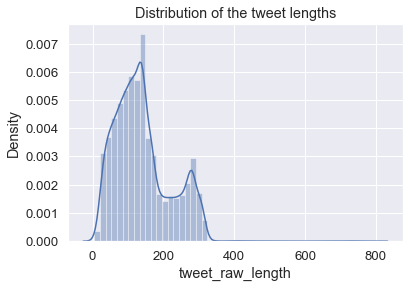

In [117]:
#Create distribution chart to visualize text length distribution
ax=sns.distplot(femaletrain_df['tweet_raw_length']).set_title('Distribution of the tweet lengths');
plt.grid(True)

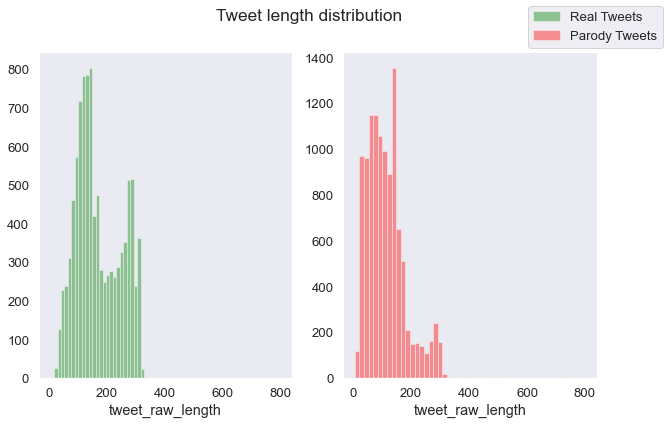

In [118]:
#Create visualization of the distribution of tweet length in comparision to label feature
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True,figsize=(10,6))
sns.distplot(femaletrain_df[(maletrain_df['label'] == 1)]['tweet_raw_length'], ax=ax1, kde=False, color='green',label='Real Tweets')
sns.distplot(femaletrain_df[(maletrain_df['label'] == 0)]['tweet_raw_length'],ax=ax2, kde=False, color='red',label='Parody Tweets');
f.suptitle('Tweet length distribution')
f.legend(loc='upper right')
ax1.grid()
ax2.grid()
plt.show()

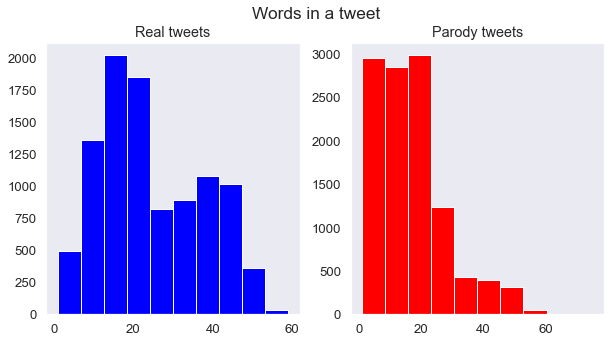

In [119]:
#Create visualization of the distribution of the word counts in comparision to label feature
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
real_tweet=maletrain_df[femaletrain_df['label']==1]['tweet_raw'].str.split().map(lambda x: len(x))
ax1.hist(real_tweet,color='blue')
ax1.set_title('Real tweets')
ax1.grid()
parody_tweet=maletrain_df[femaletrain_df['label']==0]['tweet_raw'].str.split().map(lambda x: len(x))
ax2.hist(parody_tweet,color='red')
ax2.set_title('Parody tweets')
ax2.grid()
fig.suptitle('Words in a tweet')
plt.show()

In [120]:
# A real tweet exmaple
real_tweets=femaletrain_df[femaletrain_df['label']==1]['tweet_raw'][10:20]
real_tweets

10    b'Many congratulations to two recently selecte...
11    b'If we can recapture the spirit of common pur...
12    b'When will Jeremy Corbyn apologise for his fa...
13    b'On Monday I hosted a reception to celebrate ...
14    b'From where I stand today I see the very mode...
15    b'Every child is born with potential. We just ...
16    b'Domestic abuse can take many forms, from hor...
17    b'.@englandcricket are a team that represents ...
18    b'Here we have a team that will be spoken of i...
19    b'The UK car industry has a brilliant opportun...
Name: tweet_raw, dtype: object

In [121]:
# A parody tweet exmaple
parody_tweets=femaletrain_df[femaletrain_df['label']==0]['tweet_raw'][4000:4220]
parody_tweets

13924    b'Liberal friends, I will be launching my new ...
13925    b'#NewProfilePic \n#ParodyCabinet https://t.co...
13926    b'I may be descended from Nazis but I swear I’...
13927    b'I totally support Justin and everything, but...
13928    b'Oops, looks like my little website got leake...
                               ...                        
14139    b'Inspiring photo shoot, @cathmckenna!  There’...
14140    b'@MelanieTresjoly Or maybe he could be referr...
14141    b'He doesn’t mean YOU specifically, @MelanieTr...
14142    b'High heels yes, fishing line no.  For the ch...
14143    b'Fishing line is a single use plastic so Cath...
Name: tweet_raw, Length: 220, dtype: object

In [122]:
femaletrain_df.tweet_raw=femaletrain_df.tweet_raw.apply(remove_contractions)
maletest_df.tweet_raw=maletest_df.tweet_raw.apply(remove_contractions)

In [123]:
# Lets apply the clean_text function to both test and training datasets copies
femaletrain_df1=femaletrain_df.copy()
maletest_df1=maletest_df.copy()

In [124]:
femaletrain_df1.tweet_raw=femaletrain_df1.tweet_raw.apply(clean_dataset)
maletest_df1.tweet_raw=maletest_df1.tweet_raw.apply(clean_dataset)

In [159]:
# making copies of cleaned datasets that i can use further in experiment

femaletrain_df_POS=femaletrain_df1.copy()
maletest_df_POS=maletest_df1.copy()
femaletrain_df_LSTM=femaletrain_df1.copy()
maletest_df_LSTM=maletest_df1.copy()

In [126]:
#Lets look cleaned text data
def text_after_preprocess(before_text,after_text):
    
    '''
    Input- before_text=text column before cleanup
              after_text= text column after cleanup
       Output- print before and after text to compare how it looks after cleanup
       
    '''
    print('-'*60)
    print('Text before cleanup')
    print('-'*60)
    print(before_text.head(5))
    print('-'*60)
    print('Text after cleanup')
    print('-'*60)
    print(after_text.head(5))

In [127]:
text_after_preprocess(femaletrain_df.tweet_raw,femaletrain_df1.tweet_raw)

------------------------------------------------------------
Text before cleanup
------------------------------------------------------------
0    b"I'm pleased the Domestic Abuse Bill has pass...
1    b"Sorry to see @RuthDavidsonMSP step down as L...
2    b'I will continue to do all I can to serve the...
3    b'At its heart, politics is about the differen...
4    b'Many congratulations to our new @Conservativ...
Name: tweet_raw, dtype: object
------------------------------------------------------------
Text after cleanup
------------------------------------------------------------
0    pleased Domestic Abuse passed second reading H...
1    Sorry Leader Thank party Union years enjoy des...
2    continue serve national interest making United...
3    heart politics about difference every lives pe...
4    congratulations candidates their selection Bar...
Name: tweet_raw, dtype: object


In [128]:
text_after_preprocess(maletest_df.tweet_raw,maletest_df1.tweet_raw)

------------------------------------------------------------
Text before cleanup
------------------------------------------------------------
0    b'@Darth_Brexit_ @Oliver_Letwin @PaulCampbell_...
1    b'@realDonaldTrump  congrats we have officiall...
2    b'1. Elect Joe “Nothing will fundamentally cha...
3    b'Glad to be back in Chicago for the @ObamaFou...
4    b'What I was thinking when when I did my jazz ...
Name: tweet_raw, dtype: object
------------------------------------------------------------
Text after cleanup
------------------------------------------------------------
0                  Voting losers unelected bureaucrats
1             officially elected first pussy president
2    Elect Nothing fundamentally change Biden defea...
3    Chicago Summit where first learned organize wh...
4                        thinking hands elxn42 cdnpoli
Name: tweet_raw, dtype: object


In [131]:
femaletrain_df1['tweet_raw'] = femaletrain_df1['tweet_raw'].apply(lambda x: tokenizer.tokenize(x))
maletest_df1['tweet_raw'] = maletest_df1['tweet_raw'].apply(lambda x: tokenizer.tokenize(x))

In [132]:
#Lets check tokenized text
femaletrain_df1['tweet_raw'].head()

0    [pleased, domestic, abuse, passed, second, rea...
1    [sorry, leader, thank, party, union, years, en...
2    [continue, serve, national, interest, making, ...
3    [heart, politics, about, difference, every, li...
4    [congratulations, candidates, their, selection...
Name: tweet_raw, dtype: object

In [133]:
maletest_df1['tweet_raw'].head()

0             [voting, losers, unelected, bureaucrats]
1       [officially, elected, first, pussy, president]
2    [elect, nothing, fundamentally, change, biden,...
3    [chicago, summit, where, first, learned, organ...
4                 [thinking, hands, elxn, 42, cdnpoli]
Name: tweet_raw, dtype: object

In [134]:
femaletrain_df1['tweet_raw'] = femaletrain_df1['tweet_raw'].apply(lambda x : remove_stopwords(x))
maletest_df1['tweet_raw'] = maletest_df1['tweet_raw'].apply(lambda x : remove_stopwords(x))

In [135]:
femaletrain_df1['tweet_raw'] = femaletrain_df1['tweet_raw'].apply(lambda x : combine_text(x))
maletest_df1['tweet_raw'] = maletest_df1['tweet_raw'].apply(lambda x : combine_text(x))

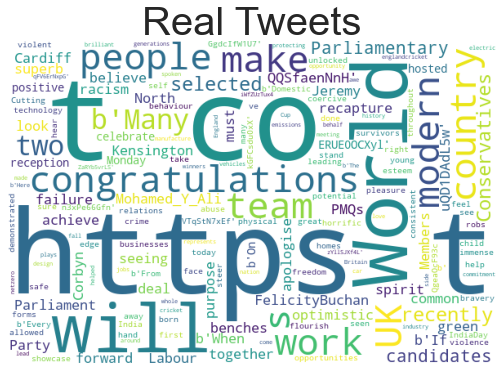

In [136]:
#Lets have a quick look of the tweets in wordcloud
from wordcloud import WordCloud
fig, ax = plt.subplots(figsize=[10, 6])
wordcloud = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(real_tweets))
ax.imshow(wordcloud)
ax.axis('off')
ax.set_title('Real Tweets',fontsize=40);

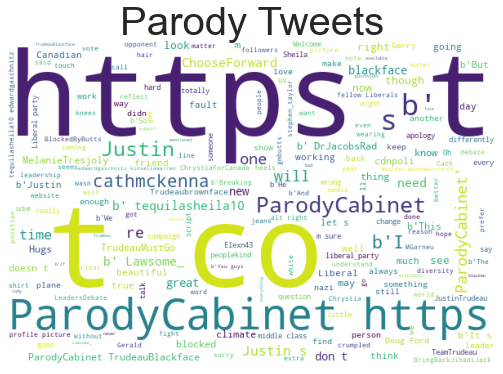

In [137]:
#Lets have a quick look of the tweets in wordcloud
from wordcloud import WordCloud
fig, ax = plt.subplots(figsize=[10, 6])
wordcloud = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(parody_tweets))
ax.imshow(wordcloud)
ax.axis('off')
ax.set_title('Parody Tweets',fontsize=40);

In [138]:
# Vectorize the text using CountVectorizer
count_vectorizer = CountVectorizer(ngram_range=(1,2))
femaletrain_cv = count_vectorizer.fit_transform(femaletrain_df1['tweet_raw'])
maletest_cv = count_vectorizer.transform(maletest_df1["tweet_raw"])

In [139]:
## Keeping only non-zero elements to preserve space 
print(femaletrain_cv[0].todense())

[[0 0 0 ... 0 0 0]]


In [140]:
# Vectorize the text using TFIDF
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 3))
femaletrain_tf = tfidf.fit_transform(femaletrain_df1['tweet_raw'])
maletest_tf = tfidf.transform(maletest_df1["tweet_raw"])

In [141]:
femaletrain_cv.shape

(21114, 136906)

In [142]:
maletest_cv.shape

(109965, 136906)

In [143]:
femaletrain_tf.shape

(21114, 25107)

In [144]:
maletest_tf.shape

(109965, 25107)

In [145]:
#Define a function to fit and predict on training and test data sets
def fit_and_predict(model,X_train,y_train,X_test,y_test):
    
    '''Input- model=model to be trained
              X_train, y_train= traing data set
              X_test,  y_test = testing data set
       Output- Print accuracy of model for training and test data sets   
    '''
    
    # Fitting a simple Logistic Regression on Counts
    clf = model
    clf.fit(X_train, y_train)
    predictions=clf.predict(X_test)
    conf_m=confusion_matrix(y_test,predictions)
    print(classification_report(y_test,predictions))
    print('-'*50)
    print("{}" .format(model))
    print('-'*50)
    print('Accuracy of classifier on training set:{}%'.format(round(clf.score(X_train, y_train)*100)))
    print('-'*50)
    print('Accuracy of classifier on test set:{}%' .format(round(accuracy_score(y_test,predictions)*100)))
    print('-'*50)
    
    # plot confusion matrix as heatmap
    sns.set(font_scale=1.2)
    ax = sns.heatmap(conf_m, annot=True,xticklabels=['Real', 'Parody'], yticklabels=['Real', 'Parody'], 
                 cbar=True, cmap='RdBu',linewidths=1, linecolor='black', fmt='.0f')
    plt.yticks(rotation=0)
    ax.set_ylim([0,2])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    ax.xaxis.set_ticks_position('top') 
    plt.title('Confusion matrix - test data\n(Real, Parody) Tweets')
    plt.show()

              precision    recall  f1-score   support

           0       0.71      0.80      0.75     55121
           1       0.77      0.68      0.72     54844

    accuracy                           0.74    109965
   macro avg       0.74      0.74      0.74    109965
weighted avg       0.74      0.74      0.74    109965

--------------------------------------------------
LogisticRegression()
--------------------------------------------------
Accuracy of classifier on training set:98%
--------------------------------------------------
Accuracy of classifier on test set:74%
--------------------------------------------------


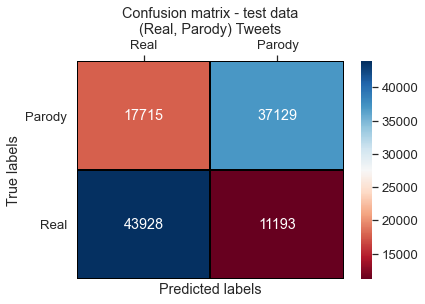

In [146]:
# Create a list of the regression models to be used
models=[LogisticRegression(C=1.0)]

# Loop through the list of models and use 'fit_and_predict()' function to trian and make predictions
for model in models:
    fit_and_predict(model,femaletrain_cv, femaletrain_df.label,maletest_cv,maletest_df.label)

              precision    recall  f1-score   support

           0       0.73      0.75      0.74     55121
           1       0.74      0.73      0.73     54844

    accuracy                           0.74    109965
   macro avg       0.74      0.74      0.74    109965
weighted avg       0.74      0.74      0.74    109965

--------------------------------------------------
LogisticRegression()
--------------------------------------------------
Accuracy of classifier on training set:92%
--------------------------------------------------
Accuracy of classifier on test set:74%
--------------------------------------------------


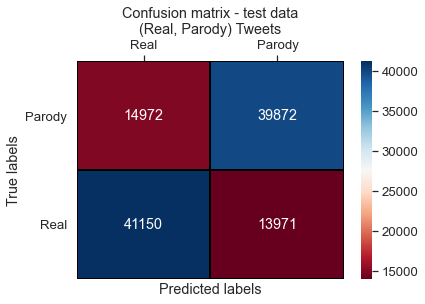

In [147]:
for model in models:
    fit_and_predict(model,femaletrain_tf,femaletrain_df.label,maletest_tf,maletest_df.label)

In [161]:
femaletrain_df_POS['tweet_raw'] = femaletrain_df_POS['tweet_raw'].apply(lambda x: tokenizer.tokenize(x))
maletest_df_POS['tweet_raw'] = maletest_df_POS['tweet_raw'].apply(lambda x: tokenizer.tokenize(x))

In [163]:
femaletrain_df_POS['tweet_raw_POS']=femaletrain_df_POS['tweet_raw'].apply(lambda x: POS(x))
femaletrain_df_POS['tweet_raw_POS'].head()

0    [(pleased, JJ), (domestic, JJ), (abuse, NN), (...
1    [(sorry, JJ), (leader, NN), (thank, NN), (part...
2    [(continue, NN), (serve, VBP), (national, JJ),...
3    [(heart, NN), (politics, NNS), (difference, NN...
4    [(congratulations, NNS), (candidates, NNS), (s...
Name: tweet_raw_POS, dtype: object

In [164]:
maletest_df_POS['tweet_raw_POS']=maletest_df_POS['tweet_raw'].apply(lambda x: POS(x))
maletest_df_POS['tweet_raw_POS'].head()

0    [(voting, VBG), (losers, NNS), (unelected, VBD...
1    [(officially, RB), (elected, VBN), (first, JJ)...
2    [(elect, JJ), (nothing, NN), (fundamentally, R...
3    [(chicago, JJ), (summit, NN), (first, RB), (le...
4    [(thinking, VBG), (hands, NNS), (elxn, RB), (4...
Name: tweet_raw_POS, dtype: object

In [165]:
femaletrain_df_POS['tweet_raw_POS']= femaletrain_df_POS['tweet_raw_POS'].apply(lambda x : combine(x))
maletest_df_POS['tweet_raw_POS']= maletest_df_POS['tweet_raw_POS'].apply(lambda x : combine(x))

In [166]:
femaletrain_df_POS['tweet_raw_POS'].head()

0    ('pleased', 'JJ'),('domestic', 'JJ'),('abuse',...
1    ('sorry', 'JJ'),('leader', 'NN'),('thank', 'NN...
2    ('continue', 'NN'),('serve', 'VBP'),('national...
3    ('heart', 'NN'),('politics', 'NNS'),('differen...
4    ('congratulations', 'NNS'),('candidates', 'NNS...
Name: tweet_raw_POS, dtype: object

In [167]:
# Vectorize the text using CountVectorizer
count_vectorizer = CountVectorizer(ngram_range=(1,2))
femaletrain_cv = count_vectorizer.fit_transform(femaletrain_df_POS['tweet_raw_POS'])
maletest_cv = count_vectorizer.transform(maletest_df_POS['tweet_raw_POS'])

# Vectorize the text using TFIDF
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 3))
femaletrain_tf = tfidf.fit_transform(femaletrain_df_POS['tweet_raw_POS'])
maletest_tf = tfidf.transform(maletest_df_POS['tweet_raw_POS'])


In [168]:
#Define a function to fit and predict on training and test data sets
def fit_and_predict(model,X_train,y_train,X_test,y_test):
    
    '''Input- model=model to be trained
              X_train, y_train= traing data set
              X_test,  y_test = testing data set
       Output- Print accuracy of model for training and test data sets   
    '''
    
    # Fitting a simple Logistic Regression on Counts
    clf = model
    clf.fit(X_train, y_train)
    predictions=clf.predict(X_test)
    conf_m=confusion_matrix(y_test,predictions)
    print(classification_report(y_test,predictions))
    print('-'*50)
    print("{}" .format(model))
    print('-'*50)
    print('Accuracy of classifier on training set:{}%'.format(round(clf.score(X_train, y_train)*100)))
    print('-'*50)
    print('Accuracy of classifier on test set:{}%' .format(round(accuracy_score(y_test,predictions)*100)))
    print('-'*50)
    
    # plot confusion matrix as heatmap
    sns.set(font_scale=1.2)
    ax = sns.heatmap(conf_m, annot=True,xticklabels=['Real', 'Parody'], yticklabels=['Real', 'Parody'], 
                 cbar=True, cmap='RdBu',linewidths=1, linecolor='black', fmt='.0f')
    plt.yticks(rotation=0)
    ax.set_ylim([0,2])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    ax.xaxis.set_ticks_position('top') 
    plt.title('Confusion matrix - test data\n(Real, Parody) Tweets')
    plt.show()

              precision    recall  f1-score   support

           0       0.74      0.75      0.74     55121
           1       0.74      0.73      0.74     54844

    accuracy                           0.74    109965
   macro avg       0.74      0.74      0.74    109965
weighted avg       0.74      0.74      0.74    109965

--------------------------------------------------
LogisticRegression()
--------------------------------------------------
Accuracy of classifier on training set:98%
--------------------------------------------------
Accuracy of classifier on test set:74%
--------------------------------------------------


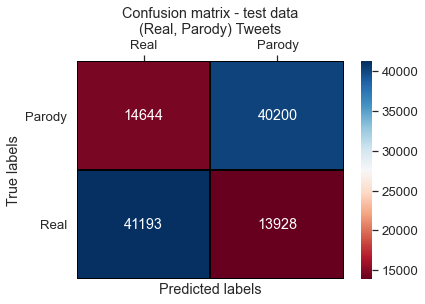

In [169]:
# Create a list of the regression models to be used
models=[LogisticRegression(C=1.0)]

# Loop through the list of models and use 'fit_and_predict()' function to trian and make predictions
for model in models:
    fit_and_predict(model,femaletrain_cv, femaletrain_df.label,maletest_cv,maletest_df.label)

              precision    recall  f1-score   support

           0       0.74      0.73      0.73     55121
           1       0.73      0.74      0.74     54844

    accuracy                           0.74    109965
   macro avg       0.74      0.74      0.74    109965
weighted avg       0.74      0.74      0.74    109965

--------------------------------------------------
LogisticRegression()
--------------------------------------------------
Accuracy of classifier on training set:92%
--------------------------------------------------
Accuracy of classifier on test set:74%
--------------------------------------------------


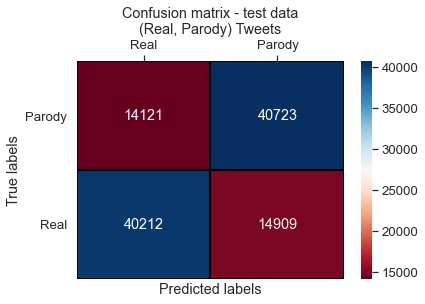

In [170]:
for model in models:
    fit_and_predict(model,femaletrain_tf,femaletrain_df.label,maletest_tf,maletest_df.label)